In [1]:
import csv
import pandas as pd
import numpy as np
import json
import jsonlines
import re
from termcolor import colored
csv.field_size_limit(100000000)
import pickle

from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

try:
    from urllib.parse import urlparse
except ImportError:
     from urlparse import urlparse
%matplotlib inline 

import matplotlib.dates as mdates
import matplotlib.ticker as tick

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.float_format = '{:.4f}'.format

# RandomForestClassifier
## TweetsCov19
### (Tweet content + user features)

In [2]:
pfad_tsv = 'C:/Mo/hhu/hhu_ba/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/TweetsFormodel/tweetsCov19_sample_with_users_2.tsv'
#pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_sample/TweetsCov19_alle_geloeschten/TweetsCov19_all_del_posted.tsv'


df_tweetscov19_user = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.', 'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.', 'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'Moderacy p.T.', 'porn_shalla', 'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz', 'news_shalla', 'socialnet_shalla', 'World_dmoz', 'Social', 'Family', 'Friend', 'Female', 'Male' , 'Work', 'Leisure', 'Home', 'Money', 'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation', 'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past', 'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive', 'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number', 'Quantitative', 'See', 'Hear', 'Feel', 'Motion', 'Space', 'Time', 'Political p.u.', 'Science p.u.', 'Moderacy p.u.', 'Posted n.', 'Deleted n.', 'Deletion ratio', 'Reputation' ])
pd.options.display.max_columns = None
print('Shape :', df_tweetscov19_user.shape)
df_tweetscov19_user.head()

Shape : (20000, 94)


,Tweet_Id,Username,Is_deleted,Retweets,Likes,Sentiment,Hashtags n.,Mentions n.,Text l.,URLs n.,Readability,Emoji n.,Emoji sentiment,Political p.T.,Science p.T.,Moderacy p.T.,porn_shalla,Regional_dmoz,Arts_dmoz,Sports_dmoz,news_shalla,socialnet_shalla,World_dmoz,Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Political p.u.,Science p.u.,Moderacy p.u.,Posted n.,Deleted n.,Deletion ratio,Reputation
0,1233473754921152512,8fe9b418701764653293ed43ad73a3bc,True,0,0,-0.6124,0,0,116,1,11.4250,0,0.0000,0,-1,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,0.0000,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,6.2500,0.0000,-1.0000,-1.0000,5,5,1.0000,0.3925
1,1243540282194485257,d1bf01e1b2c37d5572ddd49e90a8e38e,True,14,6,-0.0516,0,1,110,1,18.4050,0,0.0000,1,-1,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,1.0000,-1.0000,0.3333,4,4,1.0000,0.4766
2,1191706871486238721,596e6ef538674e15721bcb0387d30d86,True,0,0,-0.6705,0,0,162,1,76.5530,0,0.0000,0,-1,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,4.0000,0.0000,0.0000,4.0000,0.0000,0.0000,4.0000,0.0000,12.0000,8.0000,0.0000,0.0000,0.0000,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,8.0000,0.0000,0.0000,-1.0000,-1.0000,1,1,1.0000,0.2455
3,1262429853980254211,c108b4535d6704a21efd27bd2ed666ab,True,0,0,-0.1531,0,0,97,1,18.4050,0,0.0000,0,-1,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.6700,6.6700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.3300,0.0000,0.0000,-1.0000,-1.0000,3,3,1.0000,0.2288
4,1262843110373183488,deca88b4fad40c67235d3737365ba99c,True,0,0,0.8122,0,0,271,0,101.5950,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.5100,0.0000,0.0000,0.0000,1.7500,1.7500,0.0000,0.0000,0.0000,0.0000,0.0000,1.7500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7500,0.0000,0.0000,1.7500,5.2600,1.7500,0.0000,1.7500,5.2600,0.0000,1.7500,1.7500,1.7500,3.5100,0.0000,0.0000,3.5100,1.7500,0.0000,0.0000,15.7900,0.0000,0.0000,0.0000,0.0000,0.0000,1.7500,14.0400,7.0200,14.0400,5.2600,0.0000,1.7500,0.0000,17.5400,5.2600,3.5100,0.0000,0.0000,3.5100,0.0000,

In [3]:
features = df_tweetscov19_user.columns
features

Index(['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Sentiment',
       'Hashtags n.', 'Mentions n.', 'Text l.', 'URLs n.', 'Readability',
       'Emoji n.', 'Emoji sentiment', 'Political p.T.', 'Science p.T.',
       'Moderacy p.T.', 'porn_shalla', 'Regional_dmoz', 'Arts_dmoz',
       'Sports_dmoz', 'news_shalla', 'socialnet_shalla', 'World_dmoz',
       'Social', 'Family', 'Friend', 'Female', 'Male', 'Work', 'Leisure',
       'Home', 'Money', 'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak',
       'Assent', 'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'A

In [4]:
df_tweetscov19_user['Is_deleted'] = np.where(df_tweetscov19_user['Is_deleted'] == True, 0, 1)
df_tweetscov19_user.tail()

,Tweet_Id,Username,Is_deleted,Retweets,Likes,Sentiment,Hashtags n.,Mentions n.,Text l.,URLs n.,Readability,Emoji n.,Emoji sentiment,Political p.T.,Science p.T.,Moderacy p.T.,porn_shalla,Regional_dmoz,Arts_dmoz,Sports_dmoz,news_shalla,socialnet_shalla,World_dmoz,Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Political p.u.,Science p.u.,Moderacy p.u.,Posted n.,Deleted n.,Deletion ratio,Reputation
19995,1253191532989108225,8e4c53701b4b0e7f01260664f8e136cd,1,6,8,0.0000,0,3,309,0,56.9780,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,10.0000,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,4.0000,20.0000,12.0000,2.0000,0.0000,0.0000,16.0000,2.0000,2.0000,0.0000,2.0000,4.0000,0.0000,0.0000,0.0000,0.0000,10.0000,6.0000,-0.1034,1.0000,-0.6111,130,1,0.0077,0.4762
19996,1253359764907724802,c52a8ae67af236cad7f855392977753c,1,158,67,0.7175,0,0,260,0,68.8940,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2600,0.0000,2.1300,2.1300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2600,0.0000,0.0000,0.0000,0.0000,4.2600,2.1300,2.1300,0.0000,6.3800,4.2600,6.3800,0.0000,2.1300,2.1300,0.0000,0.0000,14.8900,0.0000,4.2600,0.0000,0.0000,0.0000,0.0000,4.2600,4.2600,12.7700,4.2600,6.3800,4.2600,0.0000,17.0200,2.1300,2.1300,2.1300,0.0000,0.0000,0.0000,0.0000,0.0000,2.1300,4.2600,4.2600,0.0909,-0.4286,-0.6667,59,2,0.0339,0.5418
19997,1234523088114589696,d01368fc16fc106438573f8297248f0c,1,21,39,-0.5048,1,0,290,0,67.6940,2,-0.4550,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.5100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2600,2.1300,0.0000,2.1300,0.0000,2.1300,2.1300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2600,4.2600,4.2600,0.0000,2.1300,0.0000,2.1300,6.3800,6.3800,0.0000,0.0000,4.2600,0.0000,0.0000,0.0000,6.3800,2.1300,12.7700,6.3800,2.1300,2.1300,2.1300,10.6400,0.0000,4.2600,0.0000,0.0000,2.1300,0.0000,0.0000,4.2600,0.0000,6.3800,4.2600,-0.2000,1.0000,0.0000,178,2,0.0112,0.6711
19998,1241512750876155904,7c5093a5f8edf624b0b8750b1c937337,1,0,0,0.0000,2,0,149,1,15.4040,0,0.0000,0,0,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.1429,0.0000,-0.5000,9,0,0.0000,0.5237
19999,1249117952407896065,4c2daed305a84ab9a2cd90e79da5e342,1,3,5,-0.8225,0,0,205,1,74.0390,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.7100,0.0000,0.0000,5.7100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.8600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.8600,5.7100,2.8600,0.0000,2.8600,2.8600,0.0000,2.8600,2.8600,2.8600,8.5700,0.0000,0.0000,0.0000,0.0000,0.0000,2.8600,5.7100,8.5700,5.7100,0.0000,2.8600,2.8600,8.5700,5.7100,0.0000,0.0000,2.8600,5.7100

In [5]:
features = df_tweetscov19_user.columns
features = features[2:94]
print(len(features))
features

92


Index(['Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.',
       'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.',
       'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'Moderacy p.T.',
       'porn_shalla', 'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz',
       'news_shalla', 'socialnet_shalla', 'World_dmoz', 'Social', 'Family',
       'Friend', 'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money',
       'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent',
       'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'I

In [6]:
df_tweetscov19_user_2 = df_tweetscov19_user[features.tolist()]
df_tweetscov19_user_2 = df_tweetscov19_user_2.drop(columns=['Moderacy p.T.','Moderacy p.u.', 'Posted n.', 'Deleted n.','Deletion ratio'])
df = df_tweetscov19_user_2.drop('Is_deleted', axis=1)
X = df_tweetscov19_user_2.drop('Is_deleted', axis=1).values
y = df_tweetscov19_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 86)
(20000,)


In [7]:
def split_train_test_valid(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=15)
    #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=15)
    print(X_train.shape)
    print(X_test.shape)
    #print(X_valid.shape)

    print(y_train.shape)
    print(y_test.shape)
    #print(y_valid.shape)
    return  X_train, X_test, y_train, y_test

In [8]:
 X_train, X_test, y_train, y_test = split_train_test_valid(X,y)

(16000, 86)
(4000, 86)
(16000,)
(4000,)


In [9]:
def fit_gradientboosting_clf(X,y):
    
    clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
    clf.fit(X,y)
    return clf

In [10]:
def test_gradientboosting_clf(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    

In [11]:
gb_model = fit_gradientboosting_clf(X_train, y_train)

In [12]:
#pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/TweetsCov19_GB_Benutzer_Inhalt_alle_ohne_moderacy_2.sav'
#pickle.dump(gb_model, open(pfad_modell, 'wb'))

In [13]:
test_gradientboosting_clf(gb_model, X_test, y_test)

Accuracy : 0.712


In [14]:
def features_classifier_(df, model):

    column_feature = {}

    for i, c in enumerate(df):
        #print(c, '   ', decisionTC.feature_importances_[i])

        column_feature[c] = model.feature_importances_[i]
        #print(c)
    df_column_feature = pd.DataFrame(column_feature.items(), columns=['Feature','importance'])
    df_column_feature.sort_values(by = ['importance'], ascending = False, inplace = True)

    df_column_feature = df_column_feature.reset_index()
    df_column_feature
    return df_column_feature

In [15]:
f_importances = features_classifier_(df, gb_model)
f_importances

,index,Feature,importance
0,83,Political p.u.,0.2773
1,0,Retweets,0.2110
2,1,Likes,0.1687
3,85,Reputation,0.1046
4,84,Science p.u.,0.0724
5,5,Text l.,0.0261
6,11,Science p.T.,0.0182
7,7,Readability,0.0093
8,4,Mentions n.,0.0073
9,2,Sentiment,0.0072


In [16]:
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      2003
           1       0.73      0.67      0.70      1997

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



In [17]:
def plot_confusion_matrix(y_test, y_pred, classes, titel):
    
    confusion_mx = confusion_matrix(y_test, y_pred)
    confusion_mx = confusion_mx / confusion_mx.sum(axis=1).reshape(-1,1)
    
    sns.heatmap(confusion_mx, xticklabels = classes, yticklabels = classes, annot=True)
    plt.title(titel)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

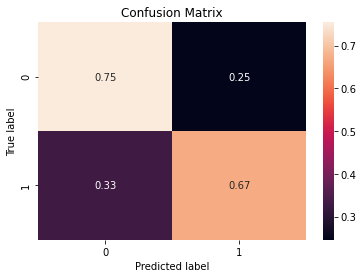

In [18]:
plot_confusion_matrix(y_test, y_pred, gb_model.classes_, 'Confusion Matrix')

In [19]:
def print_cross_val_score(model, X_test, y_test):
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='precision')
    print(" percision : %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='f1')
    print(" f1        : %0.2f +/- %0.3f" % (scores.mean(), scores.std()))
    scores = cross_val_score(model, X_test, y_test, cv=10, scoring='recall')
    print(" recall    : %0.2f +/- %0.3f" % (scores.mean(), scores.std()))

In [20]:
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/Tweetscov19_GB_Benutzer_Inhalt_48.sav'
#gb_model = pickle.load(open(pfad_modell, 'rb'))

In [21]:
print_cross_val_score(gb_model, X, y)

 percision : 0.73 +/- 0.016
 f1        : 0.69 +/- 0.009
 recall    : 0.65 +/- 0.009


************************************************
************************************************

## Plot feature Imortances
### TweetCov19 (Content + User)

In [25]:
def plot_hist_Features(l_features_importances, l_features, titel):
    
    #colors = ['mediumorchid', 'gold', 'green', 'peru', 'red', 'mediumslateblue', 'deepskyblue', 'darkkhaki', 'brown']
    colors = ['steelblue', 'indigo', 'brown', 'green', 'black']
    
    x = np.arange(len(l_features))
    #figure(figsize=(12, 8), dpi=80)
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [10,7]
    
    #ax.hist(df1, df2 = bins,  color = 'mediumslateblue', label = 'nicht gelöscht')
    ax.bar(x, l_features_importances, color = colors)
    ax.set_title('Gradient Boosting', fontweight="bold", fontsize=20)
    #ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(l_features, fontsize=26,  rotation='vertical')
         
    #ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=17)

    fig.tight_layout() #plt.legend()
    #plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/classifeier/'+titel+'.pdf')

In [26]:
l_features = f_importances.Feature.tolist()
l_features = l_features[:5]

l_features_importances = f_importances.importance.tolist()
l_features_importances = l_features_importances[0:5]
l_features

['Political p.u.', 'Retweets', 'Likes', 'Reputation', 'Science p.u.']

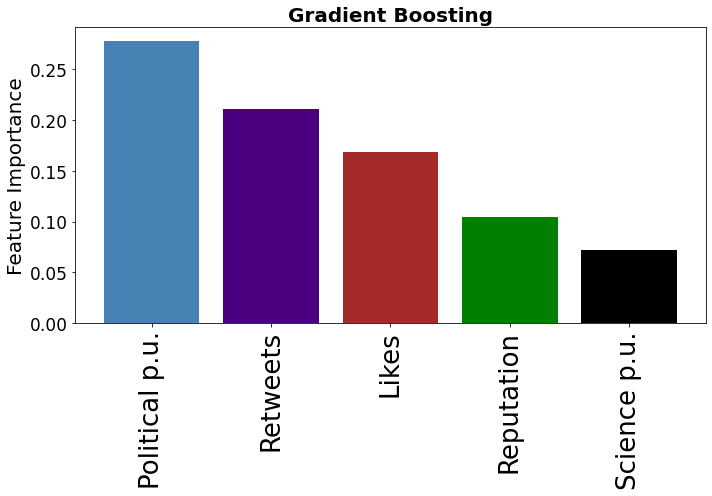

In [27]:
plot_hist_Features(l_features_importances, l_features, 'Gb_TweetsCov19_content_User(reputation)_2_o_moderacy_all_del')

************************************************
************************************************

## TweetsCov19
### (Content only)

In [28]:
features = df_tweetscov19_user.columns
features

features = features[2:87]
df_tweetscov19_user_2 = df_tweetscov19_user[features.tolist()]
df_tweetscov19_user_2 = df_tweetscov19_user_2.drop(columns=[ 'Moderacy p.T.'])

df = df_tweetscov19_user_2.drop('Is_deleted', axis=1)
X = df_tweetscov19_user_2.drop('Is_deleted', axis=1).values
y = df_tweetscov19_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 83)
(20000,)


In [29]:
features

Index(['Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.',
       'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.',
       'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'Moderacy p.T.',
       'porn_shalla', 'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz',
       'news_shalla', 'socialnet_shalla', 'World_dmoz', 'Social', 'Family',
       'Friend', 'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money',
       'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent',
       'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'I

In [30]:
X_train, X_test, y_train, y_test = split_train_test_valid(X,y)

(16000, 83)
(4000, 83)
(16000,)
(4000,)


In [31]:
%%time
gb_model = fit_gradientboosting_clf(X_train, y_train)
test_gradientboosting_clf(gb_model, X_test, y_test)

Accuracy : 0.6725
Wall time: 6.16 s


In [32]:
#pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetscov19_sample/Modells/TweetsCov19_GB_Inhalt_all_ohne_moderacy.sav'
#pickle.dump(gb_model, open(pfad_modell, 'wb'))

In [33]:
f_importances = features_classifier_(df, gb_model)
f_importances

,index,Feature,importance
0,0,Retweets,0.3388
1,1,Likes,0.2337
2,11,Science p.T.,0.0689
3,10,Political p.T.,0.0503
4,5,Text l.,0.0485
5,7,Readability,0.0258
6,4,Mentions n.,0.0234
7,2,Sentiment,0.0154
8,3,Hashtags n.,0.0122
9,71,Verb,0.0119


In [34]:
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      2003
           1       0.69      0.62      0.66      1997

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000



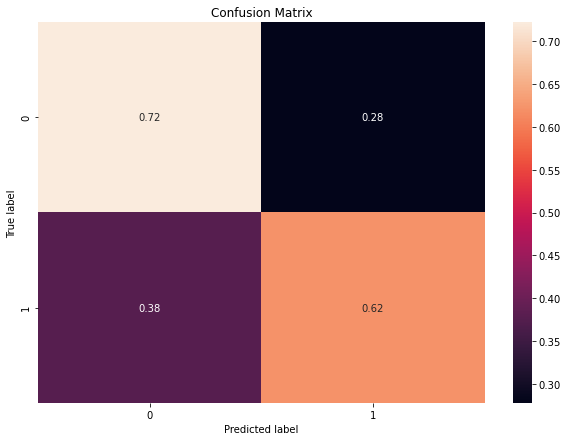

In [35]:
plot_confusion_matrix(y_test, y_pred, gb_model.classes_, 'Confusion Matrix')

In [36]:
print_cross_val_score(gb_model, X, y)

 percision : 0.69 +/- 0.016
 f1        : 0.64 +/- 0.011
 recall    : 0.60 +/- 0.012


********************************************************
********************************************************

## Plot feature Imortances
### TweetsCov19 (Content Only)

In [37]:
def plot_hist_Features_content_only(l_features_importances, l_features, titel):
    
    #colors = ['red', 'blue', 'peru', 'orange', 'yellow', 'mediumslateblue', 'deepskyblue', 'steelblue']
    colors = ['brown', 'peru', 'black','tan', 'mediumslateblue']
    
    x = np.arange(len(l_features))
    #figure(figsize=(12, 8), dpi=80)
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [10,7]
    
    #ax.hist(df1, df2 = bins,  color = 'mediumslateblue', label = 'nicht gelöscht')
    ax.bar(x, l_features_importances, color = colors)
    ax.set_title('Gradient Boosting', fontweight="bold", fontsize=20)
    #ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(l_features, fontsize=26,  rotation='vertical')
         
    #ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=17)

    
    fig.tight_layout()  
    #plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/classifeier/'+titel+'.pdf')

In [38]:
l_features = f_importances.Feature.tolist()
l_features = l_features[:5]

l_features_importances = f_importances.importance.tolist()
l_features_importances = l_features_importances[0:5]
l_features

['Retweets', 'Likes', 'Science p.T.', 'Political p.T.', 'Text l.']

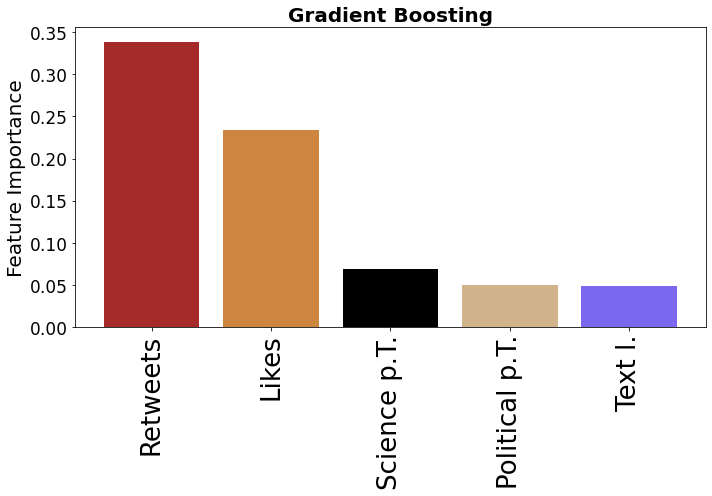

In [39]:
plot_hist_Features_content_only(l_features_importances, l_features, 'Gb_TweetsCov19_content_only_o_moderacy_all_del')

************************************************
************************************************

# Tweetskb
### (Content + User Features)

In [40]:
pfad_tsv = 'C:/Mo/hhu/hhu_ba/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/TweetsFormodel/tweetskb_sample_with_users_2.tsv'
#pfad_tsv = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/TweetsKB_alle_geloeschten/TweetsKB_all_del_posted.tsv'

df_tweetskb_user = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.', 'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.', 'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'Moderacy p.T.','porn_shalla', 'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz', 'news_shalla', 'socialnet_shalla', 'World_dmoz', 'Social', 'Family', 'Friend', 'Female', 'Male' , 'Work', 'Leisure', 'Home', 'Money', 'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation', 'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past', 'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They', 'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive', 'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'Number', 'Quantitative', 'See', 'Hear', 'Feel', 'Motion', 'Space', 'Time', 'Political p.u.', 'Science p.u.', 'Moderacy p.u.', 'Posted n.', 'Deleted n.', 'Deletion ratio', 'Reputation' ])
pd.options.display.max_columns = None
print('Shape :', df_tweetskb_user.shape)
df_tweetskb_user.head()

Shape : (20000, 94)


,Tweet_Id,Username,Is_deleted,Retweets,Likes,Sentiment,Hashtags n.,Mentions n.,Text l.,URLs n.,Readability,Emoji n.,Emoji sentiment,Political p.T.,Science p.T.,Moderacy p.T.,porn_shalla,Regional_dmoz,Arts_dmoz,Sports_dmoz,news_shalla,socialnet_shalla,World_dmoz,Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Political p.u.,Science p.u.,Moderacy p.u.,Posted n.,Deleted n.,Deletion ratio,Reputation
0,1202268108003528704,1HANDBOILER,True,0,0,0.7003,0,0,122,0,75.7650,1,0.2210,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0900,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,9.0900,0.0000,4.5500,4.5500,0.0000,0.0000,0.0000,13.6400,0.0000,0.0000,4.5500,0.0000,0.0000,4.5500,4.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.5500,4.5500,1.0000,0.0000,1.0000,4,4,1.0000,0.4911
1,1213572654831194114,larrysch12,True,0,0,-0.5106,0,0,118,1,52.2650,0,0.0000,0,0,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,9.5200,0.0000,0.0000,0.0000,0.0000,9.5200,0.0000,0.0000,4.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7600,0.0000,0.0000,4.7600,4.7600,4.7600,0.0000,0.0000,0.0000,0.0000,0.0000,9.5200,4.7600,4.7600,4.7600,4.7600,4.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7600,14.2900,0.0000,0.0000,4.7600,0.0000,9.5200,9.5200,4.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7600,0.0000,-1.0000,-1.0000,3,3,1.0000,0.3052
2,1212400773834907648,ncappraiser30,True,1,0,-0.8750,0,0,85,1,53.6550,0,0.0000,0,0,-1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.2900,14.2900,0.0000,0.0000,14.2900,0.0000,0.0000,0.0000,0.0000,0.0000,7.1400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.1400,0.0000,7.1400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.2900,0.0000,0.0000,7.1400,0.0000,0.0000,14.2900,7.1400,0.0000,0.0000,0.0000,0.0000,0.0000,7.1400,0.0000,7.1400,7.1400,0.0000,0.0000,-1.0000,1,1,1.0000,0.2962
3,1209396801578520576,Villagejonesy,True,0,0,0.3291,0,4,335,1,5.6580,0,0.0000,0,0,-1,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000,4.0000,0.0000,0.0000,2.0000,0.0000,2.0000,0.0000,2.0000,2.0000,0.0000,0.0000,2.0000,4.0000,0.0000,0.0000,6.0000,0.0000,0.0000,0.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,6.0000,6.0000,12.0000,2.0000,6.0000,2.0000,0.0000,2.0000,4.0000,6.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,6.0000,2.0000,0.0000,0.0000,-1.0000,4,4,1.0000,0.3697
4,1232707291985608707,scjallen1,True,0,0,-0.4767,0,0,102,1,-19.6750,0,0.0000,1,-1,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-1.0000,1.0000,2,2,1.0000,0.5051


In [41]:
features = df_tweetskb_user.columns
#features

In [42]:
df_tweetskb_user['Is_deleted'] = np.where(df_tweetskb_user['Is_deleted'] == True, 0, 1)
df_tweetskb_user.tail()

,Tweet_Id,Username,Is_deleted,Retweets,Likes,Sentiment,Hashtags n.,Mentions n.,Text l.,URLs n.,Readability,Emoji n.,Emoji sentiment,Political p.T.,Science p.T.,Moderacy p.T.,porn_shalla,Regional_dmoz,Arts_dmoz,Sports_dmoz,news_shalla,socialnet_shalla,World_dmoz,Social,Family,Friend,Female,Male,Work,Leisure,Home,Money,Relegion,Death,Informal,Swear,Netspeak,Assent,Nonfluence,Filler,Body,Health,Sexual,Ingest,Pos. emo.,Neg. emo.,Anxiety,Anger,Sadness,Insight,Cause,Discrep,Tentativness,Certainty,Differentiation,Affiliation,Achieve,Power,Reward,Risk,Focus past,Focus present,Focus future,I,We,You,SheHe,They,Ipron,Article,Preposition,Auxverb,Adverb,Conjunctive,Negate,Verb,Adjective,Compare,Interrogative,Number,Quantitative,See,Hear,Feel,Motion,Space,Time,Political p.u.,Science p.u.,Moderacy p.u.,Posted n.,Deleted n.,Deletion ratio,Reputation
19995,1234071787153039361,stevendem,1,0,0,-0.4215,0,1,157,1,83.4660,0,0.0000,1,-1,1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.4500,0.0000,0.0000,0.0000,0.0000,3.4500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.9000,0.0000,3.4500,0.0000,3.4500,0.0000,0.0000,0.0000,3.4500,3.4500,3.4500,0.0000,0.0000,3.4500,0.0000,0.0000,0.0000,0.0000,3.4500,10.3400,3.4500,0.0000,3.4500,0.0000,13.7900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.9000,3.4500,1.0000,-1.0000,1.0000,2,0,0.0000,0.3854
19996,1234597672704782336,johnbostock3,1,188,257,-0.4588,0,1,70,0,32.5600,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.1100,0.0000,0.0000,0.0000,0.0000,11.1100,0.0000,0.0000,11.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.1100,0.0000,11.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,11.1100,11.1100,0.0000,0.0000,11.1100,0.0000,0.0000,0.0000,0.0000,0.0000,22.2200,0.0000,0.0000,0.0000,22.2200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2,0,0.0000,0.5062
19997,1224105214879232000,kuriharan,1,0,0,-0.5267,4,1,146,1,71.2920,0,0.0000,-1,0,-1,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,4.0000,0.0000,0.0000,4.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,16.0000,4.0000,0.0000,0.0000,0.0000,8.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.0000,12.0000,-1.0000,0.0000,-1.0000,35,0,0.0000,0.5468
19998,1233491190638620678,BlackIrishI,1,0,0,0.0000,1,1,93,0,46.2520,1,0.7500,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,7.6900,0.0000,7.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,7.6900,0.0000,7.6900,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.6900,0.0000,0.0000,0.0000,-1.0000,-1.0000,17,0,0.0000,0.4973
19999,1262236255707947014,MsAvaArmstrong,1,12,18,0.6492,0,0,170,0,92.0030,0,0.0000,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.1200,0.0000,0.0000,0.0000,0.0000,3.1200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.1200,0.0000,0.0000,0.0000,3.1200,3.1200,0.0000,0.0000,3.1200,0.0000,0.0000,3.1200,3.1200,0.0000,3.1200,3.1200,0.0000,0.0000,0.0000,0.0000,0.0000,3.1200,0.0000,0.0000,3.1200,0.0000,0.0000,0.0000,0.0000,9.3800,9.3800,3.1200,6.2500,9.3800,0.0000,6.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2500,0.0000,0.0256,-0.9048,-0.7143,365,2,0.0055,0.5064


In [43]:
features = features[2:94]
print(len(features))
features

92


Index(['Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.',
       'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.',
       'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'Moderacy p.T.',
       'porn_shalla', 'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz',
       'news_shalla', 'socialnet_shalla', 'World_dmoz', 'Social', 'Family',
       'Friend', 'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money',
       'Relegion', 'Death', 'Informal', 'Swear', 'Netspeak', 'Assent',
       'Nonfluence', 'Filler', 'Body', 'Health', 'Sexual', 'Ingest',
       'Pos. emo.', 'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight',
       'Cause', 'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'I

In [45]:
df_tweetskb_user_2 = df_tweetskb_user[features.tolist()]
df_tweetskb_user_2 = df_tweetskb_user_2.drop(columns=[ 'Moderacy p.T.','Moderacy p.u.','Posted n.', 'Deleted n.','Deletion ratio'])

df = df_tweetskb_user_2.drop('Is_deleted', axis=1)
X = df_tweetskb_user_2.drop('Is_deleted', axis=1).values
y = df_tweetskb_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 86)
(20000,)


In [46]:
df_tweetskb_user_2.columns

Index(['Is_deleted', 'Retweets', 'Likes', 'Sentiment', 'Hashtags n.',
       'Mentions n.', 'Text l.', 'URLs n.', 'Readability', 'Emoji n.',
       'Emoji sentiment', 'Political p.T.', 'Science p.T.', 'porn_shalla',
       'Regional_dmoz', 'Arts_dmoz', 'Sports_dmoz', 'news_shalla',
       'socialnet_shalla', 'World_dmoz', 'Social', 'Family', 'Friend',
       'Female', 'Male', 'Work', 'Leisure', 'Home', 'Money', 'Relegion',
       'Death', 'Informal', 'Swear', 'Netspeak', 'Assent', 'Nonfluence',
       'Filler', 'Body', 'Health', 'Sexual', 'Ingest', 'Pos. emo.',
       'Neg. emo.', 'Anxiety', 'Anger', 'Sadness', 'Insight', 'Cause',
       'Discrep', 'Tentativness', 'Certainty', 'Differentiation',
       'Affiliation', 'Achieve', 'Power', 'Reward', 'Risk', 'Focus past',
       'Focus present', 'Focus future', 'I', 'We', 'You', 'SheHe', 'They',
       'Ipron', 'Article', 'Preposition', 'Auxverb', 'Adverb', 'Conjunctive',
       'Negate', 'Verb', 'Adjective', 'Compare', 'Interrogative', 'N

In [47]:
X_train, X_test, y_train, y_test = split_train_test_valid(X,y)

(16000, 86)
(4000, 86)
(16000,)
(4000,)


In [48]:
gb_model = fit_gradientboosting_clf(X_train, y_train)
test_gradientboosting_clf(gb_model, X_test, y_test)

Accuracy : 0.694


In [49]:
#pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_GB_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#pickle.dump(gb_model, open(pfad_modell, 'wb'))

In [50]:
f_importances = features_classifier_(df, gb_model)
f_importances

,index,Feature,importance
0,1,Likes,0.2838
1,83,Political p.u.,0.2573
2,85,Reputation,0.1395
3,0,Retweets,0.0806
4,84,Science p.u.,0.0538
5,11,Science p.T.,0.0386
6,10,Political p.T.,0.0224
7,56,Focus past,0.0062
8,7,Readability,0.0059
9,4,Mentions n.,0.0050


In [51]:
X_train.shape

(16000, 86)

In [52]:
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      2003
           1       0.72      0.63      0.67      1997

    accuracy                           0.69      4000
   macro avg       0.70      0.69      0.69      4000
weighted avg       0.70      0.69      0.69      4000



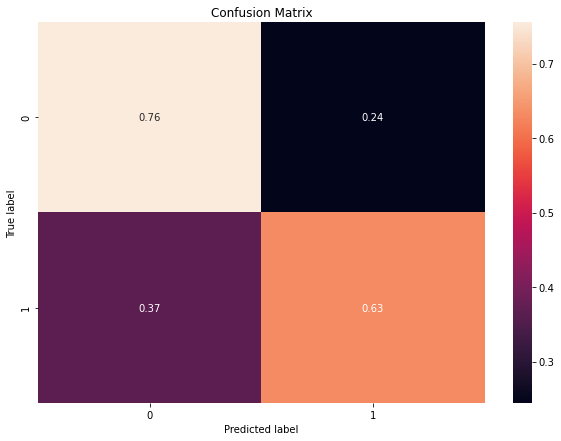

In [53]:
plot_confusion_matrix(y_test, y_pred, gb_model.classes_, 'Confusion Matrix')

In [54]:
pfad_model = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_GB_Benutzer_Inhalt_alle_ohne_moderacy.sav'
#gb_modell = pickle.load(open(pfad_modell, 'rb'))

In [55]:
print_cross_val_score(gb_model, X, y)

 percision : 0.72 +/- 0.008
 f1        : 0.68 +/- 0.008
 recall    : 0.64 +/- 0.014


*****************************************************
*****************************************************

## Plot feature Imortances
### Tweetkb (Content + User)

In [56]:
def plot_hist_Features_kb(l_features_importances, l_features, titel):
    
    #colors = ['mediumorchid', 'gold', 'green', 'peru', 'red', 'mediumslateblue', 'deepskyblue', 'darkkhaki', 'brown']
    colors = ['steelblue', 'brown', 'green', 'Indigo', 'lightblue']
    
    x = np.arange(len(l_features))
    #figure(figsize=(12, 8), dpi=80)
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [10,7]
    
    #ax.hist(df1, df2 = bins,  color = 'mediumslateblue', label = 'nicht gelöscht')
    ax.bar(x, l_features_importances, color = colors)
    ax.set_title('Gradient Boosting', fontweight="bold", fontsize=20)
    #ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(l_features, fontsize=26,  rotation='vertical')
           
    #ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=17)

   
    fig.tight_layout()
    #plt.legend()
    #plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/classifeier/'+titel+'.pdf')

In [57]:
l_features = f_importances.Feature.tolist()
l_features = l_features[:5]

l_features_importances = f_importances.importance.tolist()
l_features_importances = l_features_importances[0:5]
l_features

['Likes', 'Political p.u.', 'Reputation', 'Retweets', 'Science p.u.']

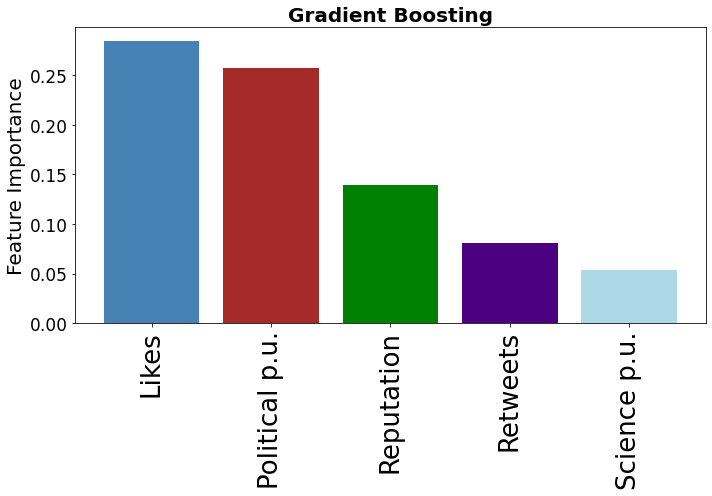

In [58]:
plot_hist_Features_kb(l_features_importances, l_features, 'Gb_Tweetskb_content_User(reputation)_2_o_moderacy_all_del')

***********************************************************************
***********************************************************************

## Tweetskb
### Content only


In [59]:
features = df_tweetskb_user.columns
features

features = features[2:83]
df_tweetskb_user_2 = df_tweetskb_user[features.tolist()]
df_tweetskb_user_2 = df_tweetskb_user_2.drop(columns=[ 'Moderacy p.T.'])

df = df_tweetskb_user_2.drop('Is_deleted', axis=1)
X = df_tweetskb_user_2.drop('Is_deleted', axis=1).values
y = df_tweetskb_user_2['Is_deleted']

y = y.astype(int)
print(X.shape)
print(y.shape)

(20000, 79)
(20000,)


In [60]:
X_train, X_test, y_train, y_test = split_train_test_valid(X,y)

(16000, 79)
(4000, 79)
(16000,)
(4000,)


In [61]:
%%time
gb_model = fit_gradientboosting_clf(X_train, y_train)
test_gradientboosting_clf(gb_model, X_test, y_test)

Accuracy : 0.6485
Wall time: 5.62 s


In [62]:
#pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_GB_Inhalt_alle_ohne_moderacy.sav'
#pickle.dump(gb_model, open(pfad_modell, 'wb'))

In [63]:
f_importances = features_classifier_(df, gb_model)
f_importances

,index,Feature,importance
0,1,Likes,0.4488
1,10,Political p.T.,0.1295
2,0,Retweets,0.1001
3,11,Science p.T.,0.0662
4,7,Readability,0.0164
5,16,news_shalla,0.0146
6,5,Text l.,0.0129
7,4,Mentions n.,0.0120
8,18,World_dmoz,0.0117
9,65,Article,0.0089


In [64]:
y_pred = gb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.73      0.67      2003
           1       0.68      0.57      0.62      1997

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000



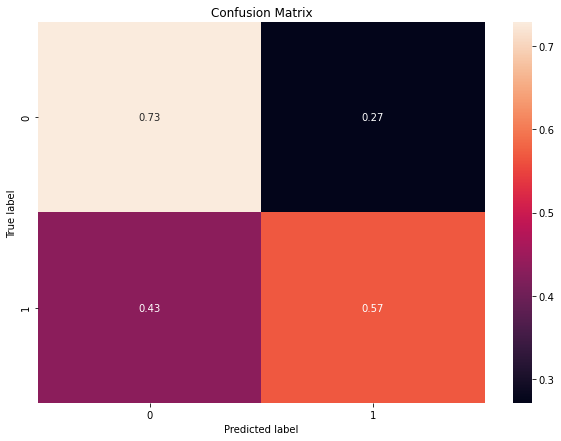

In [65]:
plot_confusion_matrix(y_test, y_pred, gb_model.classes_, 'Confusion Matrix')

In [66]:
y_prob_test = gb_model.predict_proba(X_test)
print('Logarithmic loss für Test data', log_loss(y_test, y_prob_test))

Logarithmic loss für Test data 0.6229144066973863


In [67]:
pfad_modell = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/Tweetskb_sample/Modells/TweetsKB_GB_Inhalt_alle_ohne_moderacy.sav'
#gb_regression = pickle.load(open(pfad_modell, 'rb'))

In [69]:
print_cross_val_score(gb_model, X, y)

 percision : 0.69 +/- 0.008
 f1        : 0.63 +/- 0.012
 recall    : 0.58 +/- 0.019


***************************************************
***************************************************

## Plot feature Imortances
### Tweetskb (Content Only)

In [70]:
def plot_hist_Features_content_only_kb(l_features_importances, l_features, titel):
    
    #colors = ['red', 'blue', 'peru', 'orange', 'yellow', 'mediumslateblue', 'deepskyblue', 'steelblue']
    colors = ['brown','khaki', 'lightsalmon', 'lightskyblue', 'maroon']
    
    x = np.arange(len(l_features))
    #figure(figsize=(12, 8), dpi=80)
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [10,7]
    
    #ax.hist(df1, df2 = bins,  color = 'mediumslateblue', label = 'nicht gelöscht')
    ax.bar(x, l_features_importances, color = colors)
    ax.set_title('Gradient Boosting', fontweight="bold", fontsize=20)
    #ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(l_features, fontsize=26,  rotation='vertical')
    
           
    #ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=13)

    #fig.tight_layout()
    #plt.savefig('C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/classifeier/'+titel+'.pdf')

In [71]:
l_features = f_importances.Feature.tolist()
l_features = l_features[:5]

l_features_importances = f_importances.importance.tolist()
l_features_importances = l_features_importances[0:5]
l_features

['Likes', 'Political p.T.', 'Retweets', 'Science p.T.', 'Readability']

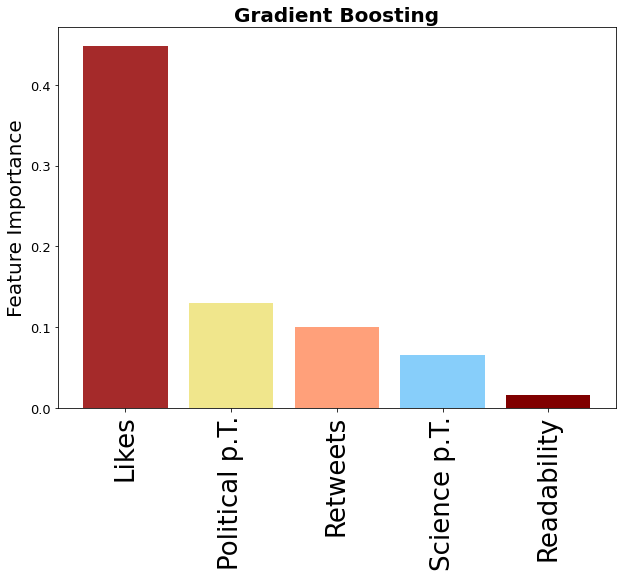

In [72]:
plot_hist_Features_content_only_kb(l_features_importances, l_features, 'Gb_Tweetskb_content_only_o_moderacy_all_del')